In [28]:
import shap
import pickle
import pandas as pd
import numpy as np
import tensorflow.keras.backend as K
from tensorflow import keras 
import tensorflow as tf
import scipy.stats as st
from numpy import mean
from numpy import std
from tensorflow.keras.metrics import binary_accuracy
from sklearn.metrics import roc_auc_score, fbeta_score, recall_score, precision_score, accuracy_score
import seaborn as sns
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
import statsmodels as statsmodels
import copy
import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels as statsmodels
import statsmodels.stats.multitest as multitest
import copy
plt.style.use('seaborn-ticks')

In [2]:
!conda env export > environment.yml

In [7]:
#load train and test data

x_train = np.loadtxt('20201230_all5_xtrain.txt')
x_test = np.loadtxt('20201230_all5_xtest.txt')
y_train = np.loadtxt('20201230_all5_ytrain.txt')
y_test = np.loadtxt('20201230_all5_ytest.txt')
x_val = np.loadtxt('20201230_all5_xval.txt')
y_val = np.loadtxt('20201230_all5_yval.txt')


In [3]:
#load model
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()
mload = tf.keras.models.load_model('20201230_MHC_all5.model')

# #make predictions for whole dataset

allpredictions = mload.predict(np.asarray(x_test))

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


In [4]:
#Places an index and predictions in dataframe so the predictions can be sorted and the SHAP value for the top predictions can be obtained


alla1p=[]
alla2p=[]
alla8p=[]
allb8p=[]
allb17p=[]

for value in allpredictions:
    alla1p.append(value[0])
    alla2p.append(value[1])
    alla8p.append(value[2])
    allb8p.append(value[3])
    allb17p.append(value[4])

x_test1 = np.array(x_test)    
alla1p = np.array(alla1p)
alla2p = np.array(alla2p)
alla8p = np.array(alla8p)
allb8p = np.array(allb8p)
allb17p = np.array(allb17p)

alldatap = {'index': range(len(alla1p)),
        'peptide': x_test1, 
        'A001': alla1p, 
        'A002': alla2p,
        'A008': alla8p,
        'B008': allb8p,
        'B017': allb17p
           } 

alldfp = pd.DataFrame(alldatap) 

alldfp = alldfp.sort_values(by='A001', ascending=False)
alla001i = alldfp['index'].tolist()
alldfp = alldfp.sort_values(by='A002', ascending=False)
alla002i = alldfp['index'].tolist()
alldfp = alldfp.sort_values(by='A008', ascending=False)
alla008i = alldfp['index'].tolist()
alldfp = alldfp.sort_values(by='B008', ascending=False)
allb008i = alldfp['index'].tolist()
alldfp = alldfp.sort_values(by='B017', ascending=False)
allb017i = alldfp['index'].tolist()


i = 0


    

Exception: Data must be 1-dimensional

In [8]:
#Pick subset of data to use

# Full Dataset
x_testall = x_test
x_testsubset = x_test

datatrain = x_train


In [8]:
# Use training data as background, average it into 100 points
x_trainmeans = shap.kmeans(np.asarray(datatrain), 100)
explainer = shap.KernelExplainer(mload.predict, x_trainmeans)


In [8]:
#calculate shap values 
shap_values = explainer.shap_values(np.asarray(x_testsubset))
#save shap_values as temp file
with open("shapvaluestemp.pkl","wb") as f:
    pickle.dump(shap_values,f)

In [9]:
# save shap_values, enter file name
with open("shapvaluesCCSall.pkl","wb") as f:
    pickle.dump(shap_values,f)



In [13]:
###Extract from file
with open("shapvaluesall.pkl","rb") as f:
    shap_values = pickle.load(f)
    shap_valuesall = shap_values


In [10]:
# transform the indexes to peptides with positions appended

char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

x_testpep = []
temppep = []
i = 0

while i < len(x_testsubset):
    j = 0
    while j < len(x_test[i]):
        temppep.append(str(char_index[int(x_testsubset[i][j])] + " " + str(j+1)))
        j+=1
    x_testpep.append(temppep)
    temppep = []
    i+=1


In [5]:
#get the top number of shap values for plotting (toppercent)
with open("shapvaluesall.pkl","rb") as f:
    shap_values = pickle.load(f)
toppercent = 0.00135
shapvaluesallA001toppercent = []
shapvaluesallA002toppercent = []
shapvaluesallA008toppercent = []
shapvaluesallB008toppercent = []
shapvaluesallB017toppercent = [] 


i=0  
while i < 5:
    shapvaluesallA001toppercent.append([])
    shapvaluesallA002toppercent.append([])
    shapvaluesallA008toppercent.append([])
    shapvaluesallB008toppercent.append([])
    shapvaluesallB017toppercent.append([])
    

    j=0
    while j < int(len(x_test)*0.00135):
        shapvaluesallA001toppercent[i].append(shap_values[i][alla001i[j]]) 
        shapvaluesallA002toppercent[i].append(shap_values[i][alla002i[j]])  
        shapvaluesallA008toppercent[i].append(shap_values[i][alla008i[j]]) 
        shapvaluesallB008toppercent[i].append(shap_values[i][allb008i[j]])
        shapvaluesallB017toppercent[i].append(shap_values[i][allb017i[j]])

        j+=1
    i+=1
        
        
peptidesallA001toppercent = []
peptidesallA002toppercent = []
peptidesallA008toppercent = []
peptidesallB008toppercent = []
peptidesallB017toppercent = [] 


i=0
while i < int(len(x_test)*toppercent):
    peptidesallA001toppercent.append(x_test[alla001i[i]])
    peptidesallA002toppercent.append(x_test[alla002i[i]])
    peptidesallA008toppercent.append(x_test[alla008i[i]])
    peptidesallB008toppercent.append(x_test[allb008i[i]])
    peptidesallB017toppercent.append(x_test[allb017i[i]])
    i+=1
#save the shap values  
with open("shapvaluesallA001toppercent.pkl","wb") as f:
    pickle.dump(shapvaluesallA001toppercent,f)
with open("shapvaluesallA002toppercent.pkl","wb") as f:
    pickle.dump(shapvaluesallA002toppercent,f)
with open("shapvaluesallA008toppercent.pkl","wb") as f:
    pickle.dump(shapvaluesallA008toppercent,f)
with open("shapvaluesallB008toppercent.pkl","wb") as f:
    pickle.dump(shapvaluesallB008toppercent,f)
with open("shapvaluesallB017toppercent.pkl","wb") as f:
    pickle.dump(shapvaluesallB017toppercent,f)

NameError: name 'alla001i' is not defined

In [6]:
# init the JS visualization code
shap.initjs()

#Plot the forceplots of the SHAP values for the defined allele shap_values[n][i] (n = A001-0, A002-1, A008-2, B008-3, B017-4)

i = 0
while i < 5:
    savename = "9mer A002 top-"
    plt.show()
    shap.force_plot(explainer.expected_value[0], shap_values[1][i], x_testpep[i], show=False, matplotlib=True)#.subplots_adjust(top = 2.5, bottom=1.5)
    savename = savename + str(i+1)
    #plt.savefig(savename+'.png', bbox_inches="tight")
    #plt.savefig(savename+'.svg', bbox_inches="tight")
    plt.show()
    i+=1

NameError: name 'explainer' is not defined

In [12]:
#Display forceplots for the top predicted peptide for each allele for the designated dataset (currently all)

savename = "A001 top predicted peptide"
plt.show()
plt.style.use('seaborn-ticks')
plt.rc('font', size=25)          # controls default text sizes
plt.rc('axes', titlesize=100)     # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=25)    # fontsize of the tick labels
plt.rc('ytick', labelsize=25)    # fontsize of the tick labels
plt.rc('legend', fontsize=50)    # legend fontsize
plt.rc('figure', titlesize=50)
x = [-0.7,0,1,2,3,4,5,6,7,8,8.7]
xt = ['',0,1,2,3,4,5,6,7,8,'']




shap.force_plot(explainer.expected_value[0], shap_values[0][alla001i[0]], x_testpep[alla001i[0]], show=False, matplotlib=True)#.subplots_adjust(top = 2.5, bottom=1.5)
print(x_testpep[alla001i[0]])

plt.xticks(x,xt)
plt.text(0.5, 0.25, str(round(explainer.expected_value[0],2)), ha='center', va='center')
plt.savefig(savename+'.png', bbox_inches="tight")
plt.savefig(savename+'.svg', bbox_inches="tight")
plt.show()

savename = "A002 top predicted peptide"
plt.show()
shap.force_plot(explainer.expected_value[1], shap_values[1][alla002i[0]], x_testpep[alla002i[0]], show=False, matplotlib=True)#.subplots_adjust(top = 2.5, bottom=1.5)
print(x_testpep[alla002i[0]])
plt.xticks(x,xt)
plt.text(0.5, 0.25, str(round(explainer.expected_value[1],2)), ha='center', va='center')
plt.savefig(savename+'.png', bbox_inches="tight")
plt.savefig(savename+'.svg', bbox_inches="tight")
plt.show()
    
savename = "A008 top predicted peptide"
plt.show()
shap.force_plot(explainer.expected_value[2], shap_values[2][alla008i[0]], x_testpep[alla008i[0]], show=False, matplotlib=True)#.subplots_adjust(top = 2.5, bottom=1.5)
print(x_testpep[alla008i[0]])
plt.xticks(x,xt)
plt.text(0.5, 0.25, str(round(explainer.expected_value[2],2)), ha='center', va='center')
plt.savefig(savename+'.png', bbox_inches="tight")
plt.savefig(savename+'.svg', bbox_inches="tight")
plt.show()
    
savename = "B008 top predicted peptide"
plt.show()
shap.force_plot(explainer.expected_value[3], shap_values[3][allb008i[0]], x_testpep[allb008i[0]], show=False, matplotlib=True)#.subplots_adjust(top = 2.5, bottom=1.5)
print(x_testpep[allb008i[0]])
plt.xticks(x,xt)
plt.text(0.5, 0.25, str(round(explainer.expected_value[3],2)), ha='center', va='center')
plt.savefig(savename+'.png', bbox_inches="tight")
plt.savefig(savename+'.svg', bbox_inches="tight")
plt.show()

savename = "B017 top predicted peptide"
plt.show()
shap.force_plot(explainer.expected_value[4], shap_values[4][allb017i[0]], x_testpep[allb017i[0]], show=False, matplotlib=True)#.subplots_adjust(top = 2.5, bottom=1.5)
print(x_testpep[allb017i[0]])
plt.xticks(x,xt)
plt.text(0.5, 0.25, str(round(explainer.expected_value[4],2)), ha='center', va='center')
plt.savefig(savename+'.png', bbox_inches="tight")
plt.savefig(savename+'.svg', bbox_inches="tight")
plt.show()

NameError: name 'alla001i' is not defined

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

# create colormap by taking tab20 premade colormap and adding black to the bottom
upper = mpl.cm.tab20(np.arange(20))
lower = [0,0,0,1]
cmap1 = np.vstack(( lower, upper))

# convert to matplotlib colormap
cmap1 = mpl.colors.ListedColormap(cmap1, name='myColorMap', N=cmap1.shape[0])


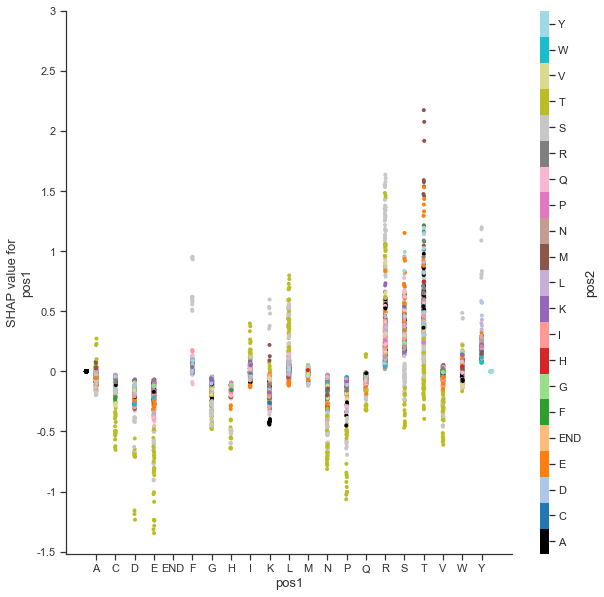

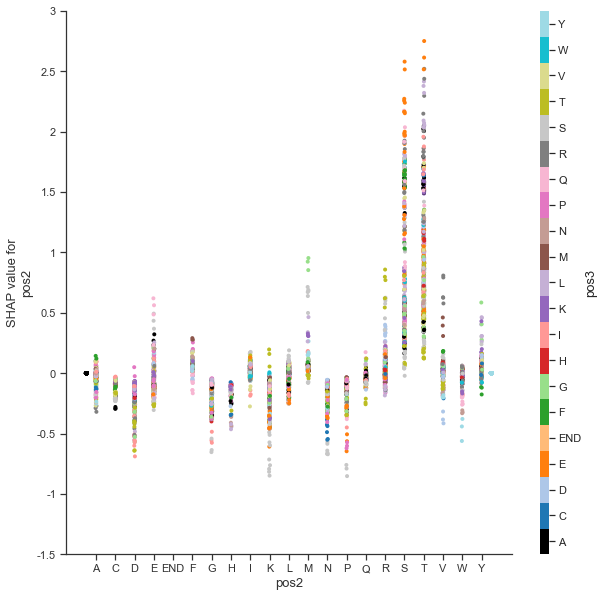

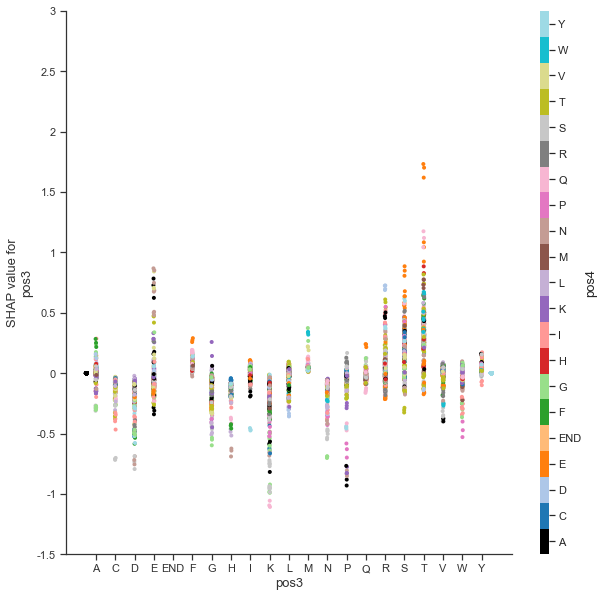

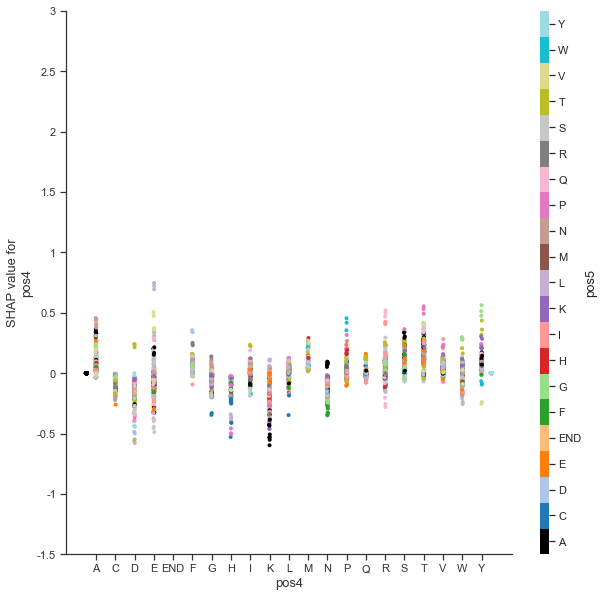

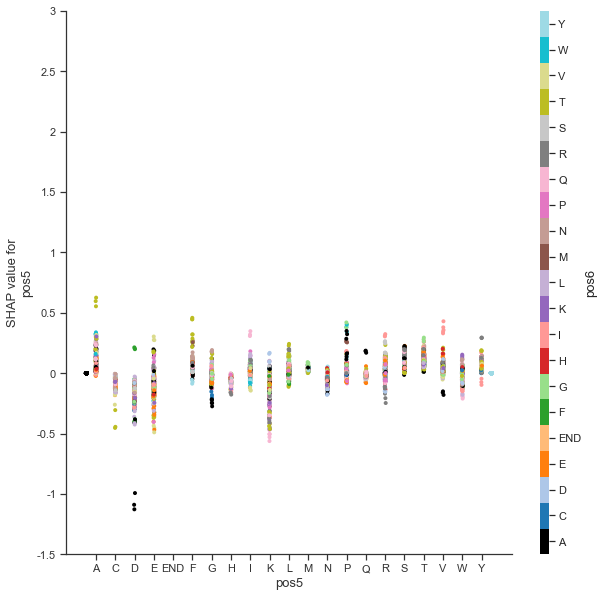

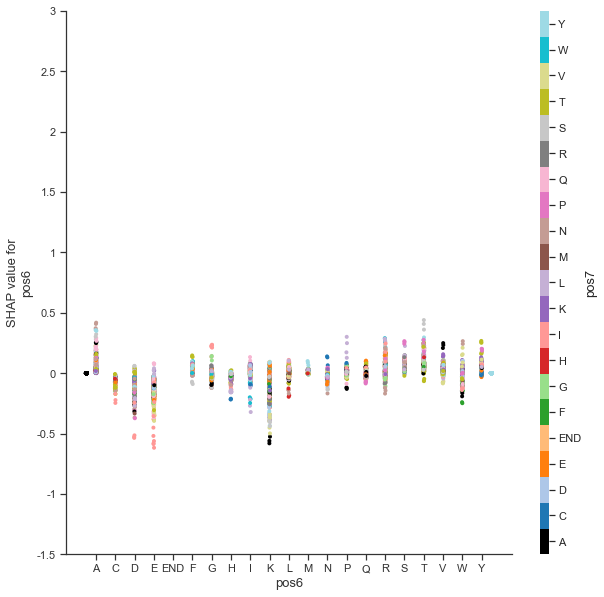

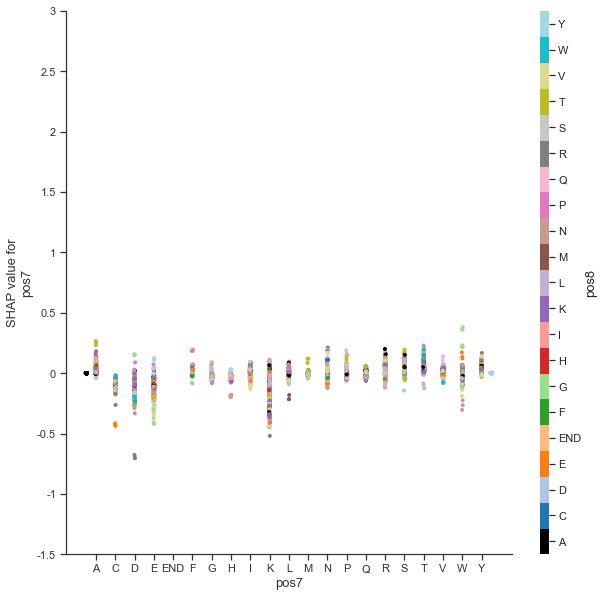

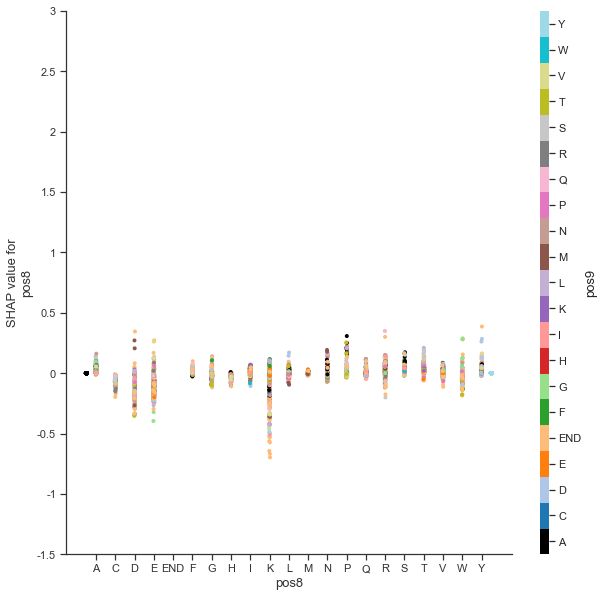

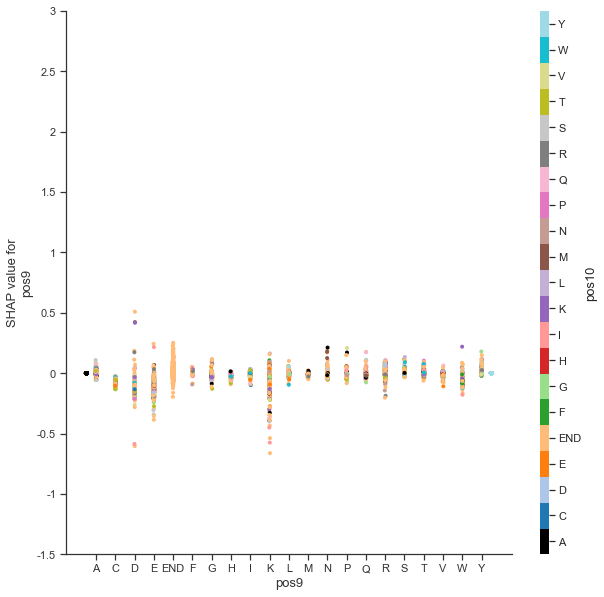

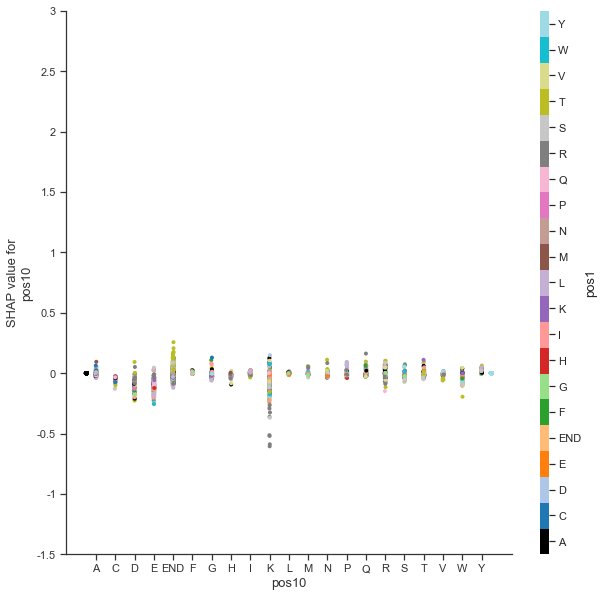

In [56]:
#Create Dependence plots for each of the positions shap.dependence_plot(a, shap_valuestmp[b], x_testadj, feature_names=['pos1', 'pos2', 'pos3','pos4', 'pos5', 'pos6','pos7', 'pos8', 'pos9','pos10'],  cmap=cmap1,show = False, x_jitter=.1,  interaction_index=c)
# a = position looking at
# b = allele looking at 
# c = position looking at interaction of i.e. colorbar


#Modify shap_values and data arrays to fix dependence_plot rounding on colorbar
shap_valuestmp = []

i = 0
while i<len(shap_values):
    j=0
    tmppeps = []
    while j < len (shap_values[i]):
        k=0
        tmpposs = []
        while k < len (shap_values[i][j]):
            tmpposs.append(shap_values[i][j][k])
            k+=1
        tmppeps.append(tmpposs)
        j+=1
    f=0
    #add 2000 blank shap values to make color bar right
    while f<2000:
        tmppeps.append([0,0,0,0,0,0,0,0,0,0])
        f+=1

    shap_valuestmp.append(tmppeps)
    
    i+=1
    
shap_valuestmp = np.array(shap_valuestmp)
i = 0
x_testadj = []

while i < len(x_test):
    tmp = []
    for value in x_test[i]:
        tmp.append(value)
    x_testadj.append(tmp)
    i+=1
i = 0
while i<1000:    
    x_testadj.append([-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5,-0.5])
    i+=1
i = 0
while i<1000:
    x_testadj.append([20.5,20.5,20.5,20.5,20.5,20.5,20.5,20.5,20.5,20.5])
    
    i+=1
x_testadj = np.array(x_testadj)

y = [-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3]
yt = [-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3]
x = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
xt = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


pos = 0

#set to allele index
allele = 1

#set to 'static', 'preceding', 'following'
compareto = 'following'
compared = 4


while pos < 10:
    
    if compareto == 'preceding':
        if pos == 0:
            compared = 9
        else:
            compared = pos-1
            
    if compareto == 'following':
        if pos == 9:
            compared = 0
        else:
            compared = pos+1
    if pos != compared:
        
        
    
        shap.dependence_plot(pos, shap_valuestmp[allele], x_testadj, feature_names=['pos1', 'pos2', 'pos3','pos4', 'pos5', 'pos6','pos7', 'pos8', 'pos9','pos10'],  cmap=cmap1, show = False, x_jitter=.1,  interaction_index=compared)
        plt.yticks(y,yt)
        plt.xticks(x,xt)

        fig = plt.gcf()
        fig.set_size_inches(10,10)
        #plt.set_clim(0,1)
        #plt.figure(figsize=(20, 10))
        cbs = []

        for ax in fig.axes:
            cbs.extend(ax.findobj(lambda obj: hasattr(obj, "colorbar") and obj.colorbar))

        colorb = cbs[0].colorbar
        #colorb.set_clim(-1, 21)
        z = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
        zt = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

        colorb.set_ticks(z)
        colorb.set_ticklabels(zt)
        #ax = plt.gca()
        #imshowobj = plt.imshow(x_testadj)
        #cbarobj = plt.colorbar(imshowobj, cmap=cmap1, ax= fig.axes[-1])
        #imshowobj.set_clim(0,20)

        #plt.savefig('dependenceplotnew' + str(pos) + '.svg', bbox_inches="tight", format = 'svg', dpi=1000)
        plt.show()
    
    pos+=1





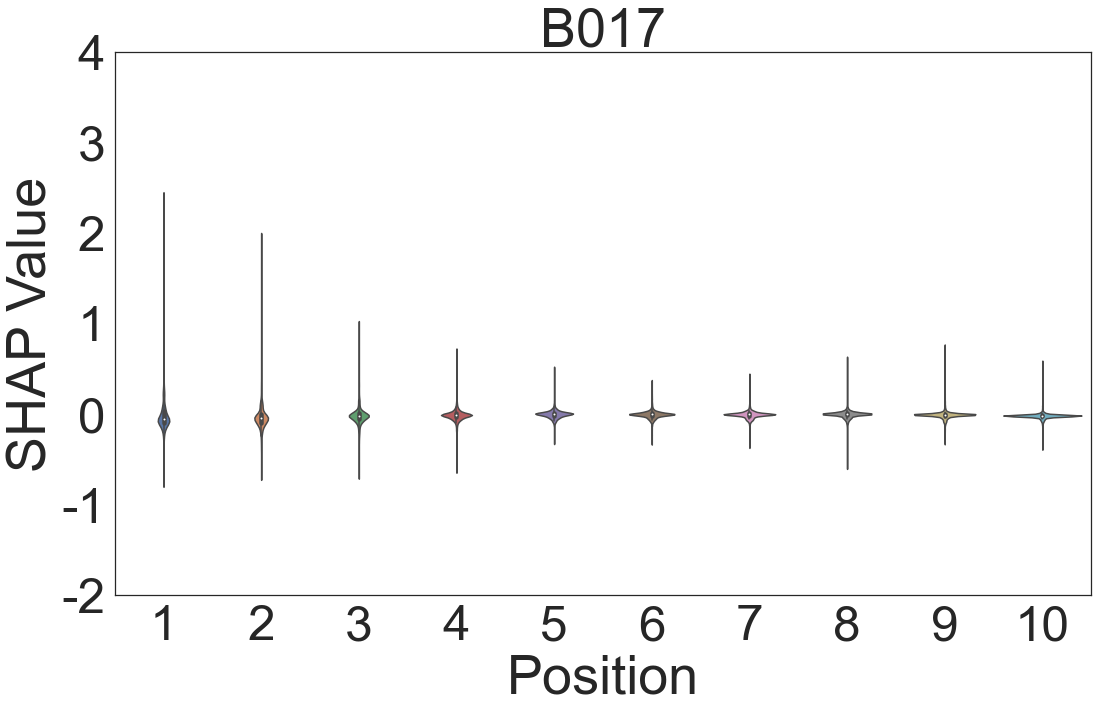

In [63]:
#shap values by position
allele = 4
shap_values = shap_values
x_test = x_test
positionalshaps = [[],[],[],[],[],[],[],[],[],[]]
i = 0
sns.set_style("white")
while i < len(shap_values[allele]):
    j = 0
    while j < len(shap_values[allele][i]):
        positionalshaps[j].append(shap_values[allele][i][j])
        j+=1
    i+=1
    
sns.violinplot(data=positionalshaps)
fig = plt.gcf()
fig.set_size_inches(17.5,10)
plt.xlabel("Position")
plt.ylabel("SHAP Value")
plt.title("B017")
sns.set(font_scale = 4.5)
y = [-2,-1,0,1,2,3,4]
yt = [-2,-1,0,1,2,3,4]
xt = ['A','C','D','E','x','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
plt.yticks(y,yt)
plt.xticks([0,1,2,3,4,5,6,7,8,9],["1" ,"2" ,"3","4","5","6","7","8","9","10"])
plt.savefig("positionSHAPrangeB017.svg")
plt.show()

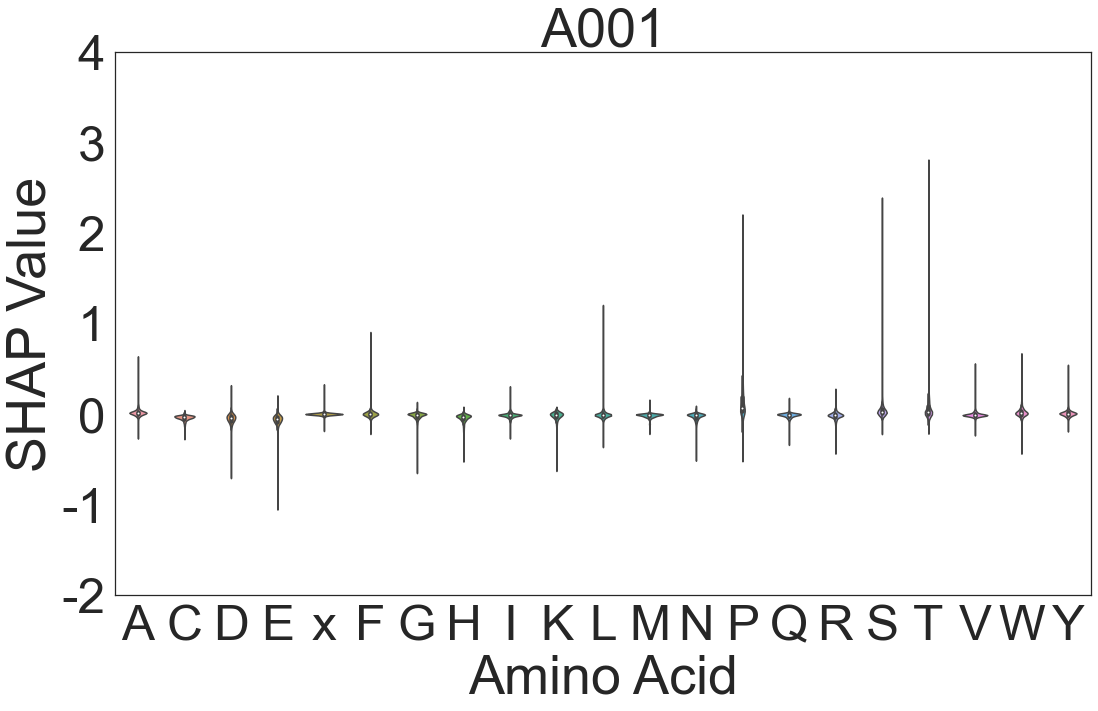

In [52]:
#shap values by amino acid
allele = 0
shap_values = shap_values
x_test = x_test
char_index = ['A','C','D','E','X','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
aminoacidshaps = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
i=0
while i < len(shap_values[allele]):
    j = 0
    while j < len(shap_values[allele][i]):
        aminoacidshaps[int(x_test[i][j])].append(shap_values[allele][i][j])
        j+=1
    i+=1
sns.set_style("white")
sns.violinplot(data=aminoacidshaps)
y = [-2,-1,0,1,2,3,4]
yt = [-2,-1,0,1,2,3,4]
plt.yticks(y,yt)
xt = ['A','C','D','E','x','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
plt.xticks(x,xt)
plt.xlabel("Amino Acid")
plt.ylabel("SHAP Value")
plt.title("A001")
sns.set(font_scale = 4.5)

fig = plt.gcf()
fig.set_size_inches(17.5,10)
plt.savefig("aminoacidSHAPrangeA001.svg")
plt.show()

In [ ]:
sns.histplot(data=allshaps)

NormaltestResult(statistic=82292.10354975359, pvalue=0.0)


<AxesSubplot:ylabel='Count'>

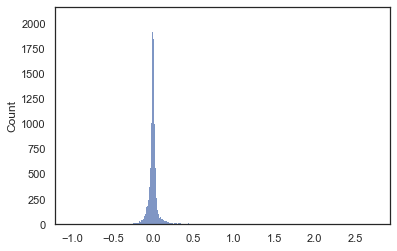

In [5]:
allshaps = []
i = 0

while i < len(shap_values[0]):
    j = 0
    while j < len(shap_values[0][i]):
        allshaps.append(shap_values[0][i][j])
        j+=1
    i+=1
    
import scipy
print(scipy.stats.normaltest(allshaps))

sns.histplot(data=allshaps)

In [50]:
#dependence analysis
import copy
shap_values = shap_values
x_test = x_test
aa = []
allele = 3
i = 0
j = 0
while i < 10:
    aa.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0


char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


i=0
j=0
k=0


#through the positions
while (i < len(shap_values[allele][0])):
    j=0
    shappostmp = []
    #through the values
    while (j < 21):
        #through the list
        k = 0
        while (k < len(shap_values[allele])):
            #place each shap value corresponding to an amino acid into a new array
            if j == x_test[k][i]:
                aa[i][j].append(shap_values[allele][k][i])
                
            k+=1
        j+=1
    i+=1
    
i = 0
j = 0


aadep = []

i = 0
j = 0
while i < 10:
    aadep.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0
temp = []
while i < len(shap_values[allele][0]):
    temp.append(copy.deepcopy(aadep))
    i+=1
i = 0
deparray = []

while i < 21:
    deparray.append(copy.deepcopy(temp))
    i+=1
    
    
    
compaadep = []

i = 0
j = 0
while i < 10:
    compaadep.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1

i = 0
j = 0
comptemp = []
while i < len(shap_values[0][0]):
    comptemp.append(copy.deepcopy(compaadep))
    i+=1
i = 0
compdeparray = []

while i < 21:
    compdeparray.append(copy.deepcopy(comptemp))
    i+=1
    


char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']


i=0
j=0
k=0
a = 0
b = 0
#through the amino acids
while (a<21):
    b=0
    while (b < len(shap_values[allele][0])):
        #through the positions
        i=0
        while (i < len(shap_values[allele][0])):
            j=0
            
            #through the values
            if (b != i):
                #print("b!=i")
                #print(b)
                while (j < 21):
                    #through the list
                    k = 0
                    while (k < len(shap_values[allele])):
                        #place each shap value corresponding to an amino acid into a new array
                        if j == x_test[k][i] and x_test[k][b] == a:
                            deparray[a][b][i][j].append(shap_values[allele][k][i])
                        if j == x_test[k][i] and x_test[k][b] != a:
                            compdeparray[a][b][i][j].append(shap_values[allele][k][i])
                        
                        k+=1
                    j+=1
            i+=1
        b+=1
    a+=1

    i = 0
j = 0
    
        

print(deparray[0][0][0])
print(compdeparray[0][0][0])
    
a = 0
b = 0
c = 0
d = 0

#Remove extra zeros
i=0
j=0
k=0
a = 0
b = 0
while (a<len(deparray)):
    b=0
    while (b < len (deparray[a])):
        i=0
        while(i < len(deparray[a][b])):
            j=0
            while(j < len(deparray[a][b][i])):
                
                if len(deparray[a][b][i][j])>1:
                    
                    deparray[a][b][i][j] = deparray[a][b][i][j][1:]
                
                if len(compdeparray[a][b][i][j])>1:
                    
                    compdeparray[a][b][i][j] = compdeparray[a][b][i][j][1:]
                
                    
                j+=1
            i+=1
        b+=1
    a+=1

[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]
[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]]


In [51]:
outputarray = []
char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
a = 0
b = 0
c = 0
d = 0
e = 0

while a < len(deparray):
    b = 0
    while b < len(deparray[a]):
        c = 0
        while c<len(deparray[a][b]):
            d = 0
            while d < len(deparray[a][b][c]):
                
                stat,test = st.mannwhitneyu(deparray[a][b][c][d][1:], compdeparray[a][b][c][d][1:])
                if test<1 and test>0:
                    
                    outputarray.append([test,char_index[a],b+1,c+1,char_index[d],len(deparray[a][b][c][d][1:]),len(compdeparray[a][b][c][d][1:]),np.mean(deparray[a][b][c][d][1:]),np.mean(compdeparray[a][b][c][d][1:]), abs(np.mean(compdeparray[a][b][c][d][1:])-np.mean(deparray[a][b][c][d][1:])), np.mean(deparray[a][b][c][d][1:])-np.mean(compdeparray[a][b][c][d][1:])])
                    e+=1
                d+=1
            c+=1
        b+=1
    a+=1

outputdf = pd.DataFrame(outputarray, columns = ["mw pvalue", "compared amino acid", "compared position", "position", "amino acid","compared size","total size", "compared mean", "total mean", "abs difference", "difference"]) 
corrmwtest = multitest.multipletests(outputdf['mw pvalue'].tolist(), alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)
outputdf.insert(1, "corr mw pvalue", corrmwtest[1])

outputdf = outputdf.sort_values(by='corr mw pvalue', ascending=True)

In [52]:
outputdf.to_csv('B008depanalysis.csv',index=False)

In [31]:
sigoutputdf =outputdf.loc[outputdf['corr mw pvalue'] <= 0.05]
#sigoutputdf =outputdf.loc[outputdf['corr mw pvalue'] <= 0.05]

In [71]:
#Start Making Heatmaps


#create array with zeros to hold shap values for each amino acid
aa = []
i = 0
while i < 10:
    aa.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
    i+=1
#print (len(aa))
#print (len(aa[0]))
#print (aa)

In [17]:
char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
#create 3D array to keep track of amino acid position shap values
#Change 
#Change shap values index for each allele 0 = A001 1 = A002 2 = A008 3 = B008 4 = B017
i = 0

while i < len(peptidesallA001toppercent):
    j=0
    
    while j < len(peptidesallA001toppercent[i]):        
        aa[j][int(peptidesallA001toppercent[i][j])].append(shapvaluesallA001toppercent[0][i][j])  
        
        j+=1
    i+=1   

In [18]:
#HEATMAP MEAN
heatmap = []
i = 0
while i < len(aa):
    j=0
    heatmap.append([])
    while j < len(aa[i]):
        if len(aa[i][j]) > 1:
            
            heatmap[i].append((sum(aa[i][j])/float(len(aa[i][j])-1)))
        else:
            heatmap[i].append(0)
            
        j+=1
    i+=1 

In [19]:
# #HEATMAP SUM
# heatmap = []
# i = 0
# while i < len(aa):
#     j=0
#     heatmap.append([])
#     while j < len(aa[i]):
#         if len(aa[i][j]) > 1:
            
#             #print(char_index[j] + str(i+1) + ": ")
            
            
#             #print(str((sum(aa[i][j])/float(len(aa[i][j])-1))))
#             heatmap[i].append(sum(aa[i][j]))
#         else:
#             heatmap[i].append(0)
            
#             #print(char_index[j] + str(i+1) + ": ")
#             #print ("0")
#         j+=1
#     i+=1 
# heatmap = np.array(heatmap)

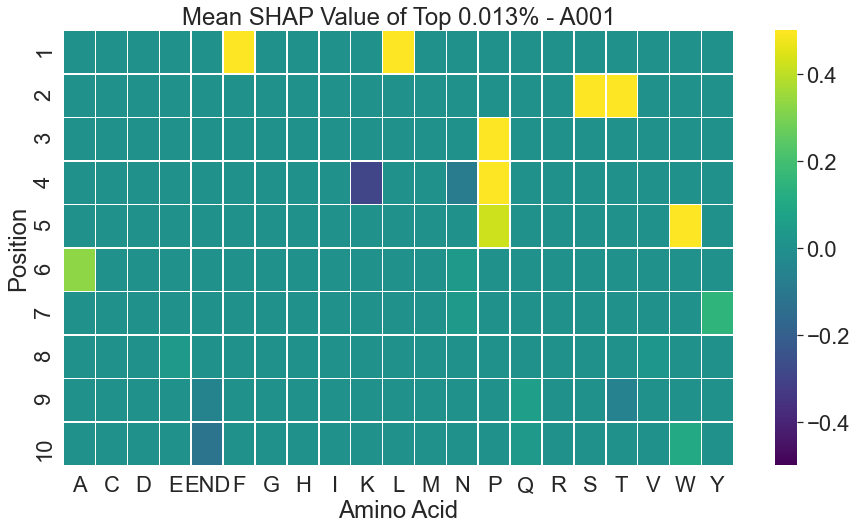

In [20]:
import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt
x_axis_labels = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] # labels for x-axis
y_axis_labels = ['1','2','3','4','5','6','7','8','9','10']
sns.set(font_scale=2)

# figure size in inches
rcParams['figure.figsize'] = 15,8

ax = sns.heatmap(heatmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,linewidths=.5, vmin=-.5, vmax=.5, cmap="viridis")


ax.set(xlabel='Amino Acid', ylabel='Position', title='Mean SHAP Value of Top 0.013% - A001')
#ax.figure.savefig('MeanSHAPvalA001-8mers.png')
ax.figure.savefig('MeanSHAPvalA001-4sigma.svg')
plt.show()

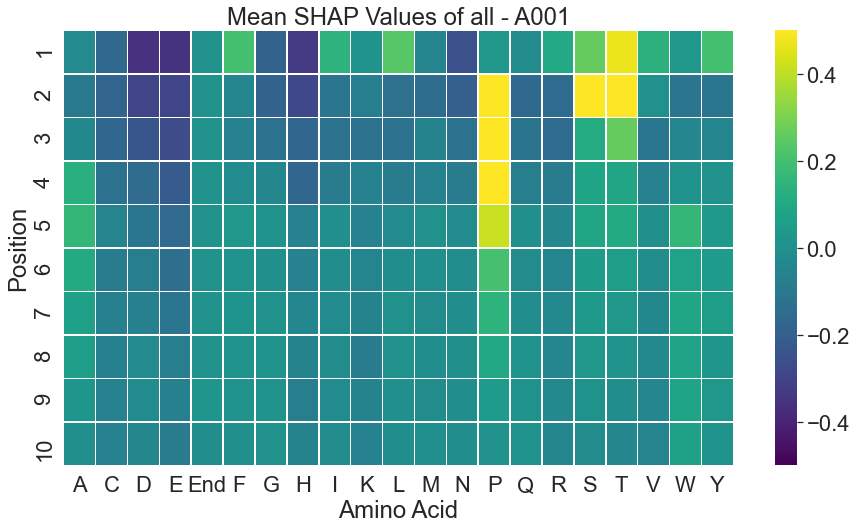

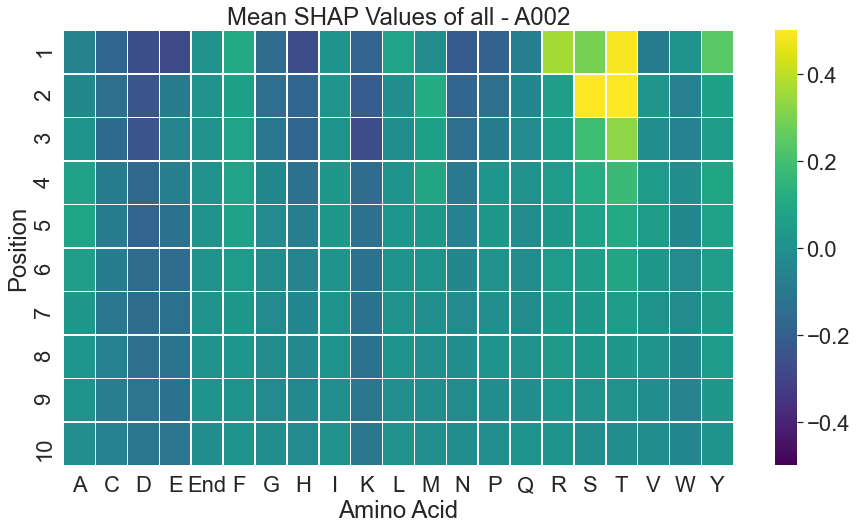

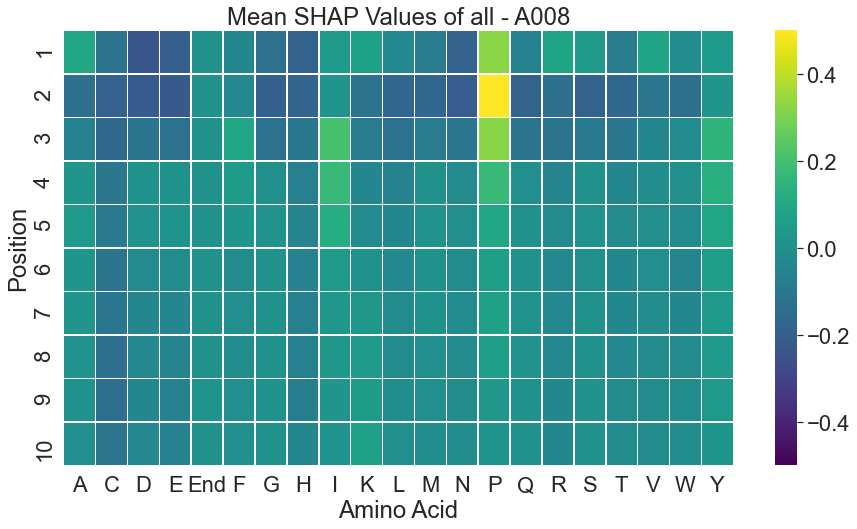

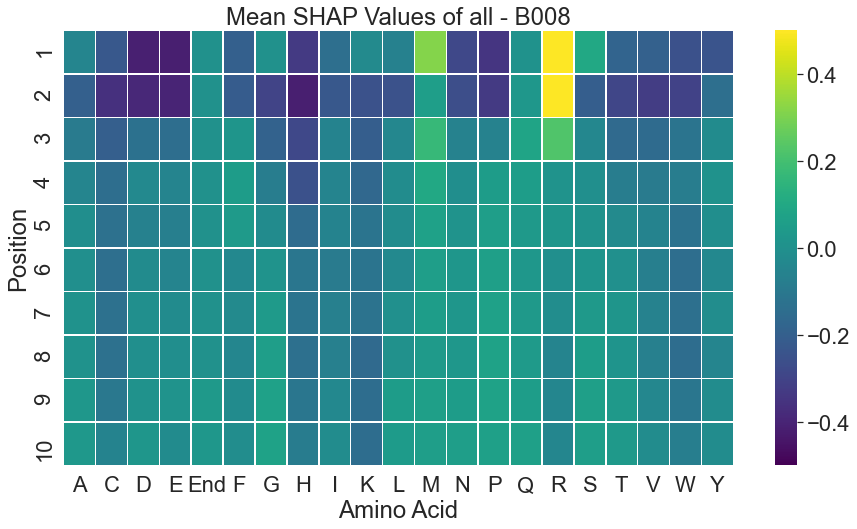

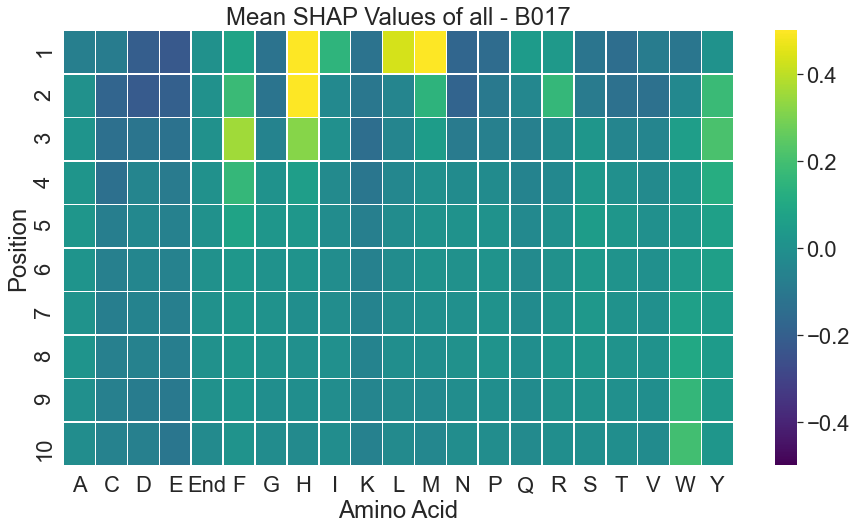

In [11]:
#Create Mean Heatmaps for all alleles

import seaborn as sns; sns.set_theme()
from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib as mpl

#Change these three to match correct values

topbottom = "top"
merfile = "all"

# Full Dataset
with open("shapvalues"+ merfile +".pkl","rb") as f:
    shap_values = pickle.load(f)

    x_testsubset = x_test
    shap_valuestmp = shap_values






    
x = 0
    
    
char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']

x_testpep = []
temppep = []
i = 0

while i < len(x_testsubset):
       
    j = 0
    while j < len(x_test[i]):
        #print(x_testsubset[i][j])
        #temppep.append(str(char_index[int(x_testsubset[i][j])] + " " + str(j+1)))
        temppep.append(str(char_index[int(x_testsubset[i][j])] + " " + str(j+1)))
        j+=1
    x_testpep.append(temppep)
    temppep = []
    i+=1


while x < 5:
    aa = []
    i = 0
    if x==0:
        figfilename='MeanSHAPValA001-'+merfile
        allelename = 'A001'
    if x==1:
        figfilename='MeanSHAPValA002-'+merfile
        allelename = 'A002'
    if x==2:
        figfilename='MeanSHAPValA008-'+merfile
        allelename = 'A008'
    if x==3:
        figfilename='MeanSHAPValB008-'+merfile
        allelename = 'B008'
    if x==4:
        figfilename='MeanSHAPValB017-'+merfile
        allelename = 'B017'
            
    i = 0
    while i < 10:
        aa.append([[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]])
        i+=1

    char_index = ['A','C','D','E','END','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y']
    #create 3D array to keep track of amino acid position shap values
    #Change shap values index for each allele 0 = A001 1 = A002 2 = A008 3 = B008 4 = B017
    i = 0
    
    while i < len(x_testsubset):
        j=0

        while j < len(x_testsubset[i]):
            
            while True:
                try:
                    
                    
                    aa[j][int(x_testsubset[i][j])].append(shap_valuestmp[x][i][j])
                    break
                except IndexError:
                    print('j=' + str(j))
                    print('i=' + str(i))
                    print('x=' + str(x))
                    print('len of aa =' + str(len(aa)))
                    print('len of aa[j] =' + str(len(aa[0])))
                    print('len of x_testsubset' + str(len(x_testsubset)))
                    print('len of x_testsubset[i]' + str(len(x_testsubset[i])))
                    print('len of shap' + str(len(shap_valuestmp)))
                    print('len of shap[x]' + str(len(shap_valuestmp[x])))
                    print('shap[x]' + str(shap_valuestmp[x]))
                    print('len of shap[x][i]' + str(len(shap_valuestmp[x][i])))
              
            #print(str(i)+ " " + str(j) + " " + str(len(x_testsubset))+ " " + str(len(x_testsubset[i]))+ " " + str(x_testsubset[i][j]))
            
            j+=1
        i+=1  
    heatmap = []
    i = 0
    while i < len(aa):
        j=0
        heatmap.append([])
        while j < len(aa[i]):
            if len(aa[i][j]) > 1:

                #print(char_index[j] + str(i+1) + ": ")


                #print(str((sum(aa[i][j])/float(len(aa[i][j])-1))))
                
                #sum
                #heatmap[i].append((sum(aa[i][j])))
                
                
                #mean
                aa[i][j] = aa[i][j][1:]
                heatmap[i].append((sum(aa[i][j])/float(len(aa[i][j])-1)))
                
                #max
                #heatmap[i].append((np.array(aa[i][j]).max()))
                
                #stddev
                #heatmap[i].append((np.std(aa[i][j])))
                
                #stderr
                #heatmap[i].append((st.sem(aa[i][j])))
                               
                #count
                #heatmap[i].append((len(np.array(aa[i][j]))))
            else:
                heatmap[i].append(0)

                #print(char_index[j] + str(i+1) + ": ")
                #print ("0")
            j+=1
        i+=1
    heatmap = np.array(heatmap)
    
    
    #heatmap = (heatmap - heatmap.mean())/(heatmap.max()-heatmap.min())
    
    #normalize based off max
    heatmap = heatmap/heatmap.max()
    
    #Log data
    #heatmap = np.log(heatmap+1)
   
    figfilename = figfilename
    #print (heatmap.max())
    #print (heatmap.min())
    
    plt.figure()
    x_axis_labels = ['A','C','D','E','End','F','G','H','I','K','L','M','N','P','Q','R','S','T','V','W','Y'] # labels for x-axis
    y_axis_labels = ['1','2','3','4','5','6','7','8','9','10']
    sns.set(font_scale=2)

    # figure size in inches
    rcParams['figure.figsize'] = 15,8

    ax = sns.heatmap(heatmap,xticklabels=x_axis_labels, yticklabels=y_axis_labels,linewidths=.5, vmin=-.5, vmax=.5, cmap="viridis")


    ax.set(xlabel='Amino Acid', ylabel='Position', title='Mean SHAP Values of '+ merfile + ' - ' + allelename)
    ax.figure.savefig(figfilename+'.png')
    ax.figure.savefig(figfilename+'.svg')
    plt.show()
    x+=1